In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import torch
#import albumentations
import glob
from imageio import imread, imwrite

In [12]:
a = imread("r12c02f04_cell18.png")
print(np.unique(a))

[0]


In [7]:
b = imread("test.npy")
b

ValueError: Could not find a format to read the specified file in single-image mode

In [ ]:
outline = Image.open("hpa_cell_mask_test/png")
ar  = np.array(outline)
print(ar.shape())

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/groups/emmalu/JUMP/raw/BR00116995/outlines/r01c17f01p01--cell_outlines.png'

In [ ]:
metadata = pd.read_csv("hpa_rescaled_metadata.csv")

/var/folders/wt/m4g27yh97r5dybqpyk1rblgw0000gn/T/ipykernel_41135/72980981.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("hpa_rescaled_metadata.csv")


In [ ]:
loc_list = list(metadata["locations"])

In [ ]:
mito = set()
agp = set()
nucrna = set()
er = set()
for i, loc in enumerate(loc_list):
    if type(loc) == str:
        if "Mitochondria" in loc:
            mito.add(i)
        if "Golgi apparatus" in loc or "Actin filaments" in loc or "Plasma membrane" in loc or "Intermediate filaments" in loc:
            agp.add(i)
        if "Nucleoli" in loc or "Nucleoli fibrillar center" in loc or "Nucleoli rim" in loc or "Cytosol" in loc:
            nucrna.add(i)
        if "Endoplasmic reticulum" in loc:
            er.add(i)



[notice] A new release of pip available: 22.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


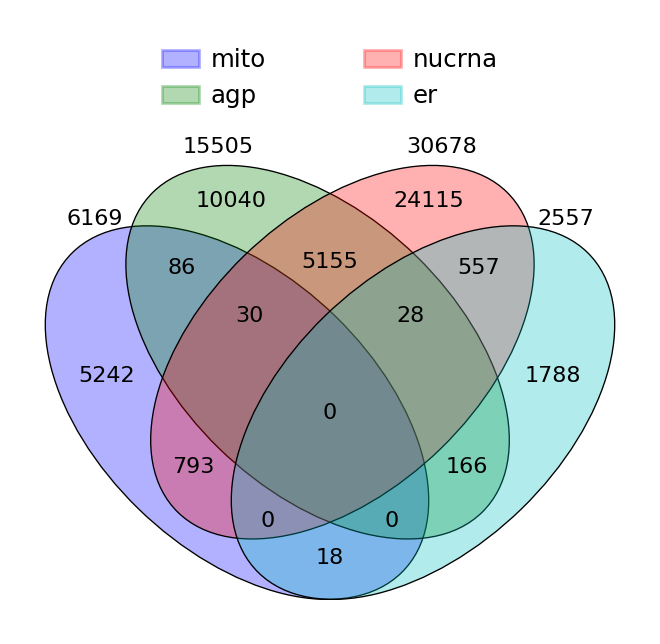

In [ ]:

from venny4py.venny4py import *

#dict of sets
sets = {
    'mito': mito,
    'agp': agp,
    'nucrna': nucrna,
    'er': er}
    
venny4py(sets=sets, size=4)

In [ ]:
df = pd.read_csv("~/sherlock_jump/IF-image.csv")
print(len(df))
df = df[(df.atlas_name=='U2OS') & (df.latest_version==23)]
print(len(df))

OSError: [Errno 6] Device not configured: '/Users/zoewefers/sherlock_jump/IF-image.csv'

In [ ]:
filenames = []
for path in df.filename:
    id = path.split("/")[-1][0:-1]
    if id not in ["188_G7_3", "188_G7_4"]:
        filenames.append(path.split("/")[-1][0:-1])

In [ ]:
print(len(filenames))
print(len(df.filename))

27558
27560


In [ ]:
good_tiled_ids = list(np.array([[id] * 16 for id in good_ids]).flatten())
tiles = np.array([i for i in range(16)] * (len(good_tiled_ids)//16)).flatten()
assert len(good_tiled_ids) == len(tiles)

In [ ]:
df = pd.DataFrame()
df["image_id"] = filenames
df["subtile"] = pd.NA
df["datasource"] = "hpa"
df["cell-line"] = "U2OS"
df["perturbation"] = pd.NA
df["split"] = pd.NA
display(df)

,image_id,subtile,datasource,cell-line,perturbation,split
0,1_A1_1,<NA>,hpa,U2OS,<NA>,<NA>
1,1_A1_2,<NA>,hpa,U2OS,<NA>,<NA>
2,1_A3_1,<NA>,hpa,U2OS,<NA>,<NA>
3,1_A3_2,<NA>,hpa,U2OS,<NA>,<NA>
4,1_A6_1,<NA>,hpa,U2OS,<NA>,<NA>
...,...,...,...,...,...,...
27553,2138_D4_4,<NA>,hpa,U2OS,<NA>,<NA>
27554,2138_E1_1,<NA>,hpa,U2OS,<NA>,<NA>
27555,2138_E1_2,<NA>,hpa,U2OS,<NA>,<NA>
27556,2138_G2_1,<NA>,hpa,U2OS,<NA>,<NA>


In [ ]:
indices = [i for i in range(len(df))]
random.shuffle(indices)
train_max = int(len(df)*0.8)
val_max = train_max + int(len(df)*0.1)
train_idxs = [idx for idx in indices[0:train_max]]
val_idxs = [idx for idx in indices[train_max:val_max]]
test_idxs = [idx for idx in indices[val_max:]]
print(len(train_idxs))
print(len(val_idxs))
print(len(test_idxs))

22046
2756
2756


In [ ]:
assert not set(train_idxs).intersection(set(val_idxs))
assert not set(train_idxs).intersection(set(test_idxs))
assert not set(test_idxs).intersection(set(val_idxs))

In [ ]:
df.loc[train_idxs, "split"] = "train"
df.loc[val_idxs, "split"] = "validation"
df.loc[test_idxs, "split"] = "test"

In [ ]:
df = pd.read_csv("bad_imgs.csv")

In [ ]:
display(df)
len(df)

,bad image,reason
0,/scratch/groups/emmalu/JUMP/raw/BR00117026/ima...,mean
1,/scratch/groups/emmalu/JUMP/raw/BR00117026/ima...,mean
2,/scratch/groups/emmalu/JUMP/raw/BR00117026/ima...,mean
3,/scratch/groups/emmalu/JUMP/raw/BR00117026/ima...,mean
4,/scratch/groups/emmalu/JUMP/raw/BR00117026/ima...,mean
5,/scratch/groups/emmalu/JUMP/raw/BR00117013/ima...,mean
6,/scratch/groups/emmalu/JUMP/raw/BR00117013/ima...,mean
7,/scratch/groups/emmalu/JUMP/raw/BR00117013/ima...,mean
8,/scratch/groups/emmalu/JUMP/raw/BR00116995/ima...,ch5 uniform (empty img?)
9,/scratch/groups/emmalu/JUMP/raw/BR00116995/ima...,ch5 uniform (empty img?)


56

In [ ]:
df = df.sample(frac=1.0, random_state=42, ignore_index=True)
len(set(df["bad image"]))

56

In [ ]:
df.to_csv("~/Documents/GitHub/stable-diffusion/zoe's notebooks/hpa_metadata.csv", index=False)

In [ ]:
path_to_img = "/Users/zoewefers/sherlock_jump/JUMP/processed/BR00117025/images/r09c22f05p01-ch8sk1fk1fl1.png"

imarray = np.array(Image.open(path_to_img)) 
print(imarray.dtype)
#imarray = np.float32(imarray)

uint8


In [1]:
for i in range(1, 200):
    print("/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/real_"+ str(i)+".png")
    print("/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/fake_"+ str(i)+".png")
    print("/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/ref_"+ str(i)+".png")

/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/real_1.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/fake_1.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/ref_1.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/real_2.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/fake_2.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/ref_2.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/real_3.png
/scratch/groups/emmalu/JUMP_HPA_validation/2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5/images/fake_3.png
/scratch/groups/emmalu/JUMP_HPA_va